In [14]:
from dune_client.client import DuneClient
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from dotenv import load_dotenv
load_dotenv()

dune_api_key = os.getenv("DEFI_JOSH_DUNE_QUERY_API_KEY")

Fecthing latest Dune query result from [https://dune.com/queries/5972407](https://dune.com/queries/5972407)

In [15]:
# dune = DuneClient(dune_api_key)
# query_result = dune.get_latest_result(5972407)  

# rows = query_result.result.rows

# data = pd.DataFrame(rows)

# data.to_csv('data/dune_data.csv', index=False)

### Loading data 

In [16]:
df = pd.read_csv('data/dune_data.csv')

# rearranging columns
df = df[[
    'wallet',
    'tx_count_365d',
    'total_volume',
    'active_weeks',
    'trader_activity_status',
    'trader_volume_status',
    'trader_weekly_frequency_status',
    'target_variable']]

df

,wallet,tx_count_365d,total_volume,active_weeks,trader_activity_status,trader_volume_status,trader_weekly_frequency_status,target_variable
0,0xa3c6acd45396110466fd8972875b3e6d33a0b0b8,2,38.726119,1,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,🔴 Bad Trader
1,0xbc0452c93e33b886d0e6750a9fc261e1d3c877ed,1,135.943754,1,🐣 Occasional User,🐟 Middle Value Trader,🐣 Unserious,🔴 Bad Trader
2,0x477b0f0e29494a1e108a302ffecff3d76663386c,1,0.457897,1,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,🔴 Bad Trader
3,0x02170d140c843646d4802f6e65f9236baccc2f70,8,37.614307,5,🐤 Regular User,🦐 Low Value Trader,🐦 OG,🔴 Bad Trader
4,0xcb69aceac5956af777d4d77c8d01c1fdea5828bd,1,2.389608,1,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,🔴 Bad Trader
...,...,...,...,...,...,...,...,...
1995,0x05a3f364d84287eb3b18757643f47cd507b58438,1,30.584974,1,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,🔴 Bad Trader
1996,0x8eb4cddb7e78fb0d5ebb75670122d2271de652a4,1,0.109873,1,🐣 Occasional User,🦐 Low Value Trader,🐣 Unserious,🔴 Bad Trader
1997,0x9ef6be20528016d65e16900cb0392eb259a743ac,2,0.827270,1,🐤 Regular User,🦐 Low Value Trader,🐣 Unserious,🔴 Bad Trader
1998,0xabaef3332e1440b3585a7ceebd6b674fbd0253f9,2,200.986683,1,🐤 Regular User,🐟 Middle Value Trader,🐣 Unserious,🔴 Bad Trader


### EDA

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wallet                          2000 non-null   object 
 1   tx_count_365d                   2000 non-null   int64  
 2   total_volume                    2000 non-null   float64
 3   active_weeks                    2000 non-null   int64  
 4   trader_activity_status          2000 non-null   object 
 5   trader_volume_status            2000 non-null   object 
 6   trader_weekly_frequency_status  2000 non-null   object 
 7   target_variable                 2000 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 125.1+ KB


In [18]:
df.describe()

,tx_count_365d,total_volume,active_weeks
count,2000.000000,2.000000e+03,2000.000000
mean,130.254500,1.381682e+05,7.452000
std,2702.634291,2.388449e+06,9.820281
min,1.000000,3.873770e-07,1.000000
25%,2.000000,3.383906e+01,1.000000
50%,6.000000,3.327111e+02,3.000000
75%,26.000000,5.036433e+03,10.000000
max,113968.000000,8.256017e+07,53.000000


In [26]:
df.target_variable.value_counts()

target_variable
🔴 Bad Trader     1000
🟢 Good Trader    1000
Name: count, dtype: int64

In [27]:
df.wallet.nunique()

2000

In [33]:
print(df.trader_activity_status.value_counts(), '\n', '========================', '\n', 
      df.trader_volume_status.value_counts(), '\n', '========================', '\n', 
      df.trader_weekly_frequency_status.value_counts())

trader_activity_status
🐦 Frequent User      832
🐤 Regular User       690
🐣 Occasional User    478
Name: count, dtype: int64 
 trader_volume_status
🐟 Middle Value Trader    1146
🦐 Low Value Trader        710
🐳 High Value Trader       144
Name: count, dtype: int64 
 trader_weekly_frequency_status
🐦 OG            1073
🐣 Unserious      673
🐤 Just there     254
Name: count, dtype: int64


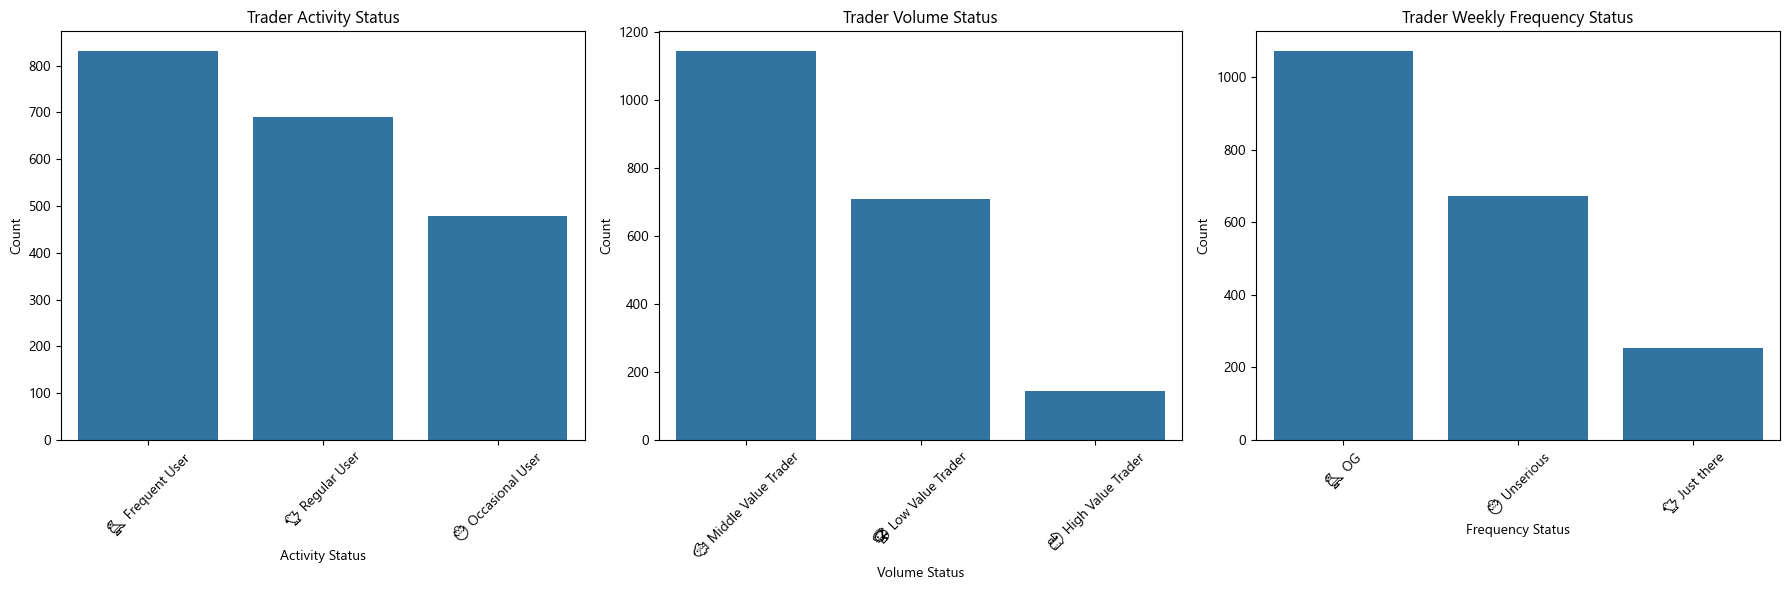

In [35]:
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Segoe UI Emoji' 

activity_counts = df.trader_activity_status.value_counts()
volume_counts = df.trader_volume_status.value_counts()
frequency_counts = df.trader_weekly_frequency_status.value_counts()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.barplot(x=activity_counts.index, y=activity_counts.values, ax=ax[0])
ax[0].set_title("Trader Activity Status")
ax[0].set_xlabel("Activity Status")
ax[0].set_ylabel("Count")
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x=volume_counts.index, y=volume_counts.values, ax=ax[1])
ax[1].set_title("Trader Volume Status")
ax[1].set_xlabel("Volume Status")
ax[1].set_ylabel("Count")
ax[1].tick_params(axis='x', rotation=45)

sns.barplot(x=frequency_counts.index, y=frequency_counts.values, ax=ax[2])
ax[2].set_title("Trader Weekly Frequency Status")
ax[2].set_xlabel("Frequency Status")
ax[2].set_ylabel("Count")
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Outliers

In [19]:
numerical_features = df.select_dtypes(exclude="object")
numerical_features.shape

(2000, 3)

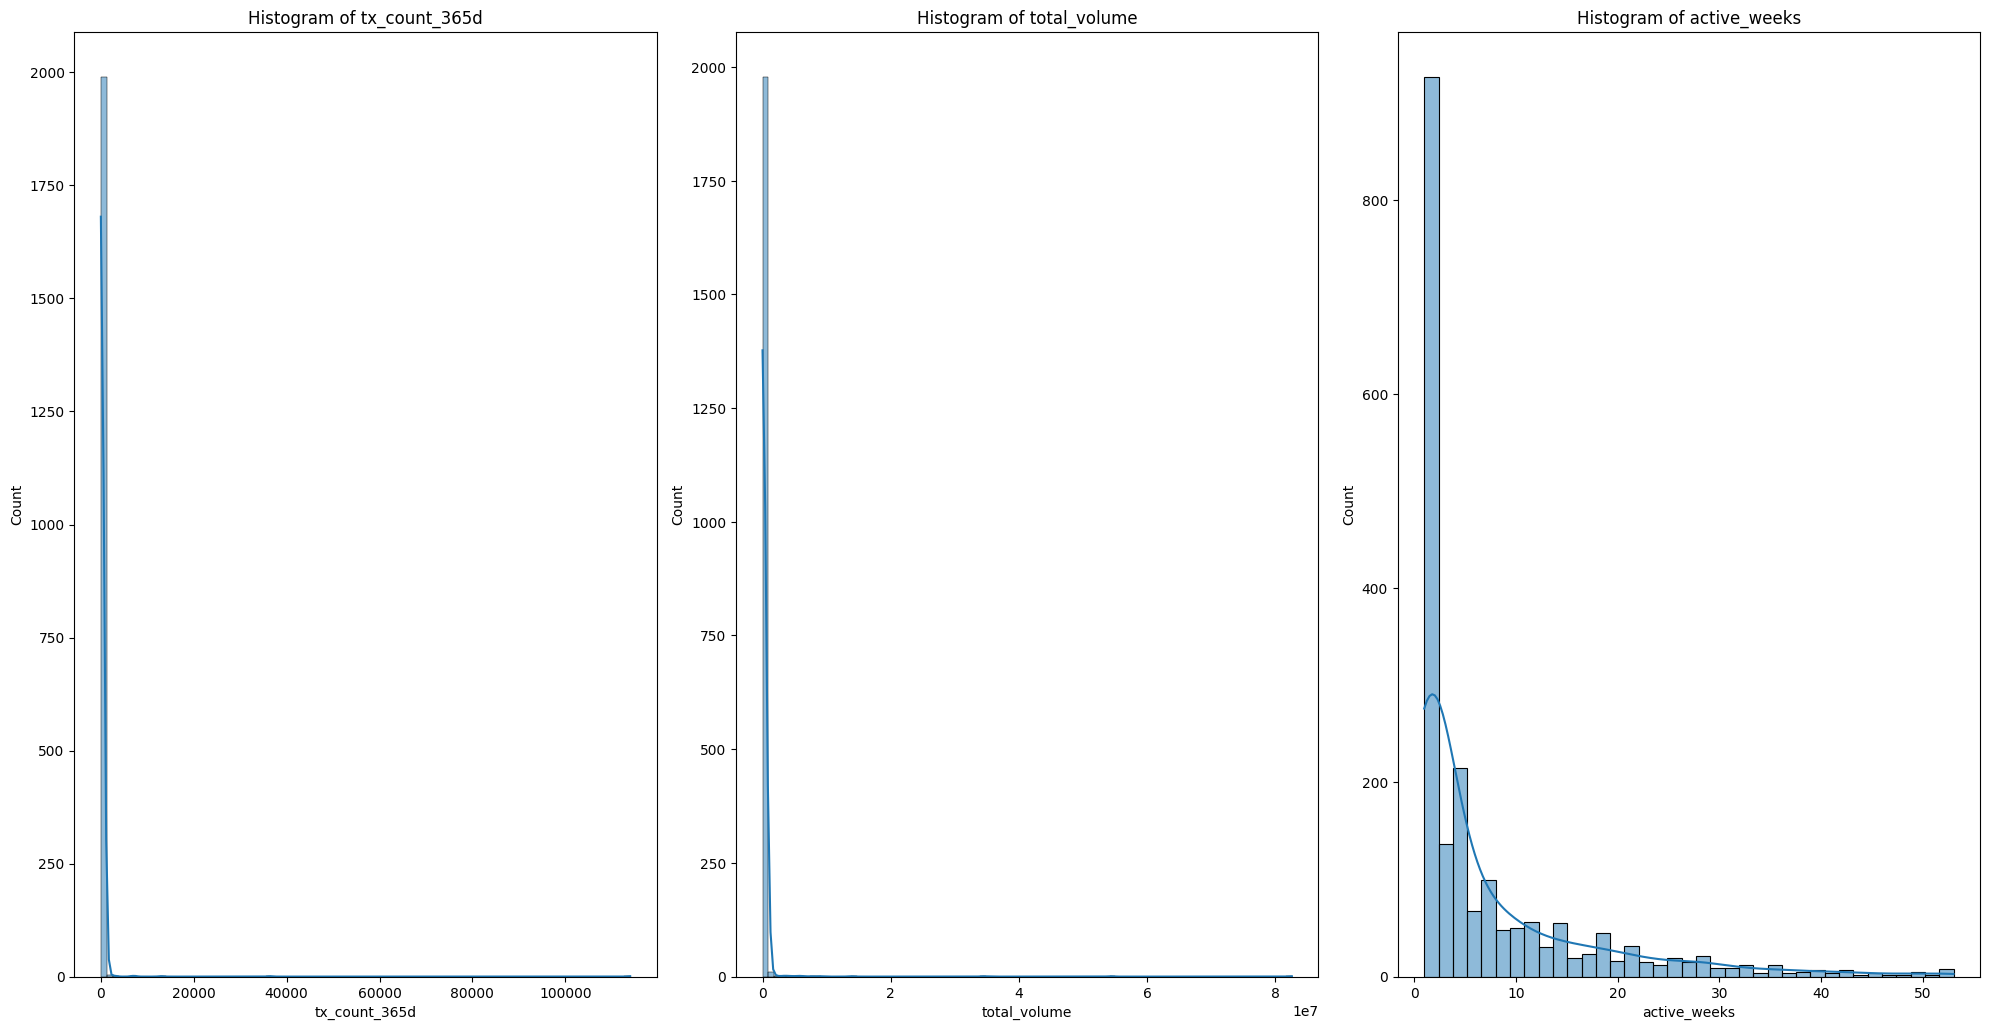

In [21]:
numerical_features = df.select_dtypes(exclude="object").columns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,20))
ax = ax.flatten()

# Plot histograms for numeric columns only
for i, col in enumerate(numerical_features):
    sns.histplot(df[col], ax=ax[i], kde=True)
    ax[i].set_title(f"Histogram of {col}")

# Remove extra (unused) subplots
for j in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

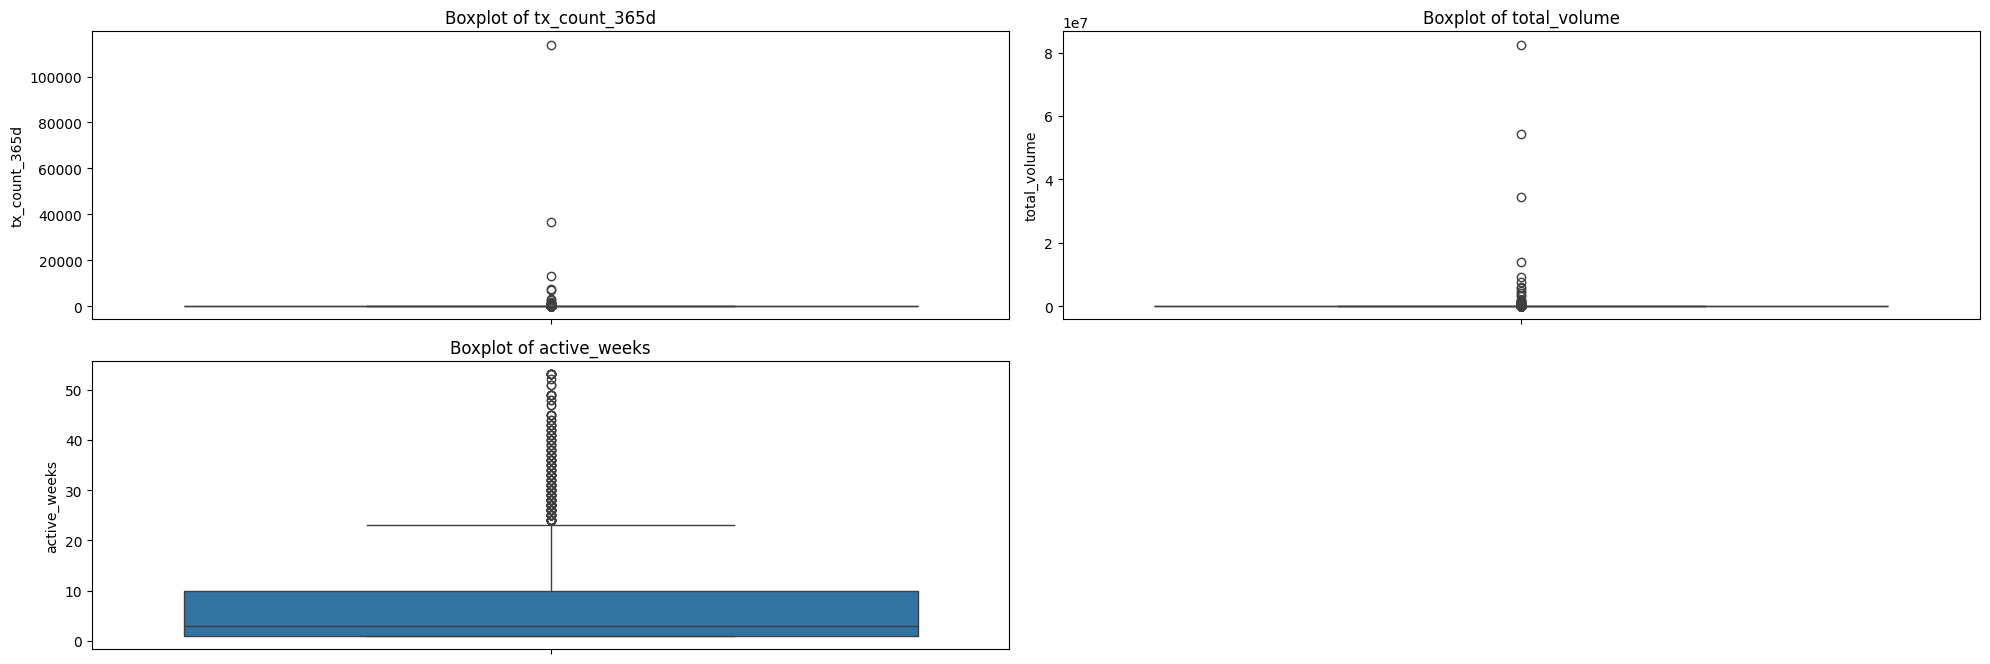

In [23]:
numerical_features = df.select_dtypes(exclude="object").columns

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 10))
ax = ax.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")

# Remove empty subplots
for j in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


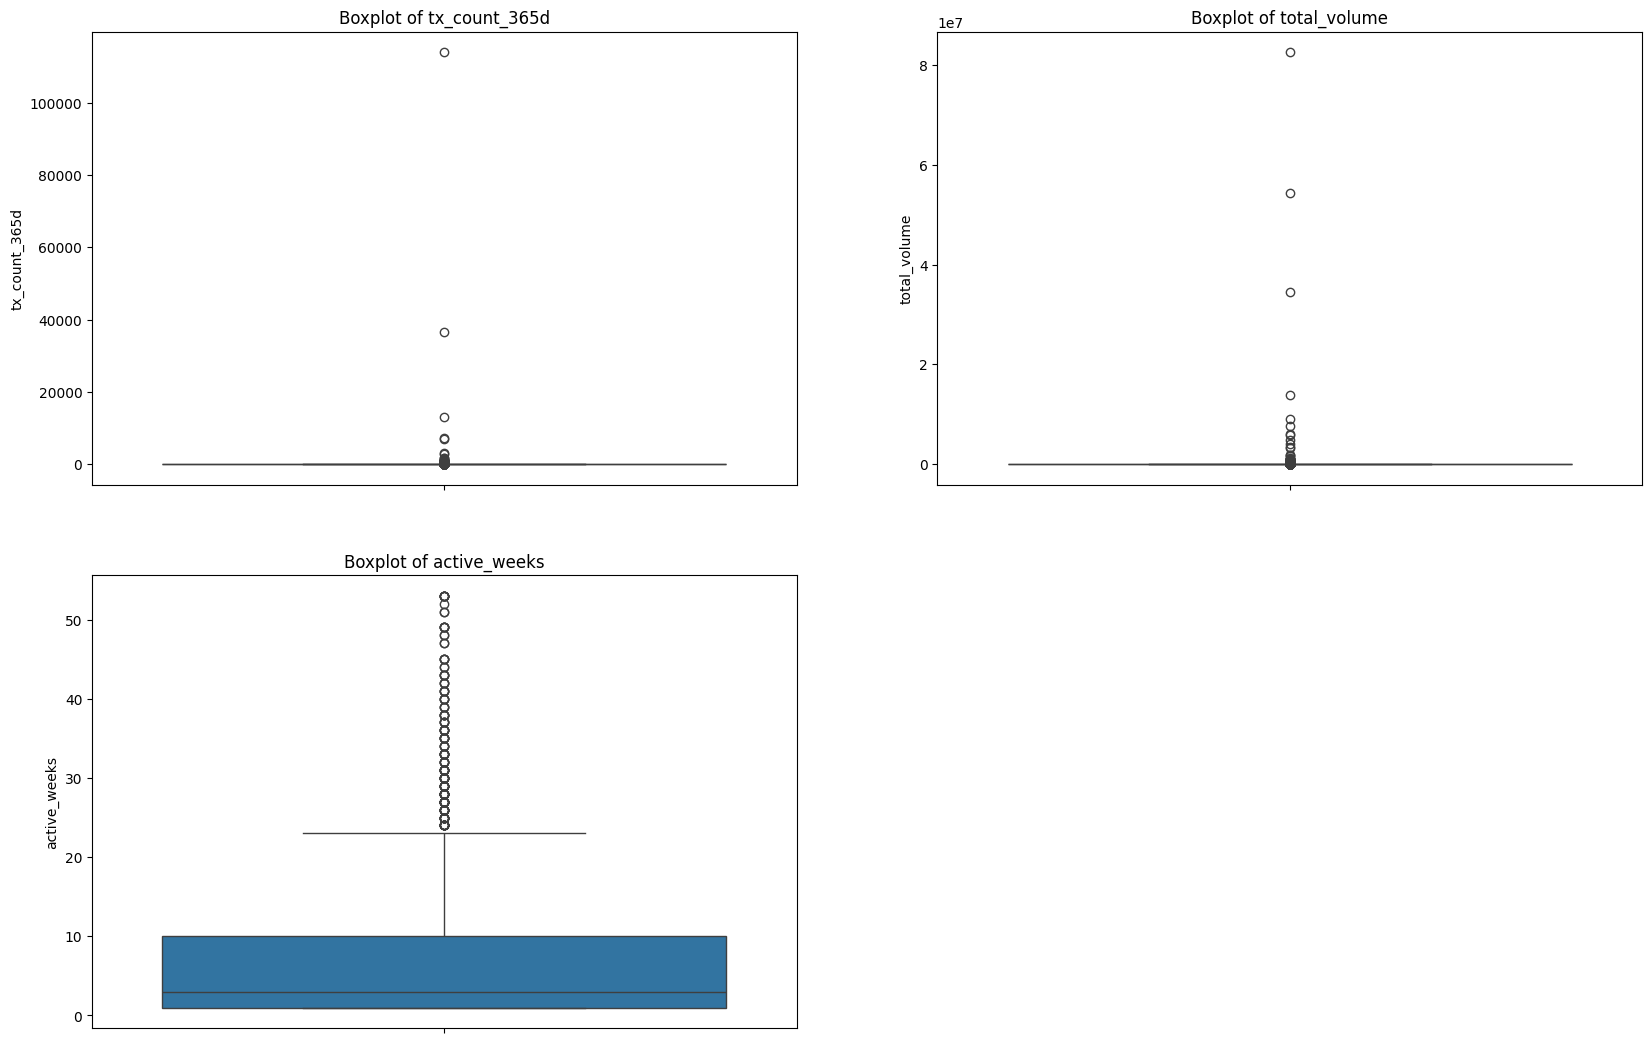

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
ax = ax.flatten()
for i, col in enumerate(numerical_features):
    sns.boxplot(df[col], ax=ax[i])
    ax[i].set_title(f"Boxplot of {col}")

for j in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[j])
    
plt.show()